## Clasificación de defectos en perfiles de acero

Primero se importan las imágenes como `Dataset` de pytorch

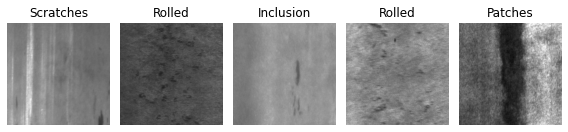

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.utils.data as tdata

train_transforms = transforms.ToTensor()
valid_transforms = transforms.ToTensor()

train_dataset = datasets.ImageFolder('data/train', transform=train_transforms)
valid_dataset = datasets.ImageFolder('data/valid', transform=valid_transforms)
test_dataset = datasets.ImageFolder('data/test', transform=valid_transforms)


fig, ax = plt.subplots(1, 5, figsize=(8, 3), tight_layout=True)
idx = np.random.permutation(len(train_dataset))
for k in range(5):
    ax[k].imshow(train_dataset[idx[k]][0].permute(1,2,0).numpy())
    ax[k].set_title(train_dataset.classes[train_dataset[idx[k]][1]])
    ax[k].axis('off')

Se propone el siguiente modelo de red convolucional:

In [2]:
import torch.nn as nn

model = nn.Sequential(nn.Conv2d(3, 32, (3, 3)), nn.ReLU(), nn.MaxPool2d(2, 2),
                      nn.Conv2d(32, 64, (3, 3)), nn.ReLU(), nn.MaxPool2d(2, 2),
                      nn.Conv2d(64, 128, (3, 3)), nn.ReLU(), nn.MaxPool2d(2, 2),
                      nn.Conv2d(128, 128, (3, 3)), nn.ReLU(), nn.MaxPool2d(2, 2),
                      nn.Conv2d(128, 128, (3, 3)), nn.ReLU(), nn.MaxPool2d(2, 2),
                      nn.Flatten(),
                      nn.Linear(2048, 256), nn.ReLU(), nn.Dropout(0.2),
                      nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.2),
                      nn.Linear(128, 6)
                      )
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=2048, out_features=256, bias=True)
  (17): ReLU()
  (18): Dropout(p=0.2, inplace=False)
  (19): Linear(in_features=256, out_features=128, bias=Tru

Ajustamos los parámetros en el conjunto de entrenamiento y verificamos que el modelo no se sobreajuste con el conjunto de validación:

In [3]:
import torch
from tqdm.notebook import tqdm

train_loader = tdata.DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = tdata.DataLoader(valid_dataset, batch_size=512, shuffle=False)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for epoch in tqdm(range(15)): # número de épocas
    epoch_loss, acc = 0.0, 0.0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        acc += torch.sum(yhat.argmax(dim=1) == y).item()
    epoch_loss /= len(train_loader.dataset)
    acc /= len(train_loader.dataset)
    print(f"Train {epoch}, Loss: {epoch_loss:0.4f}, Acc: {acc:0.3f}")
    
    epoch_loss, acc = 0.0, 0.0
    model.eval()
    for x, y in valid_loader:
        yhat = model(x)
        loss = criterion(yhat, y)
        epoch_loss += loss.item()
        acc += torch.sum(yhat.argmax(dim=1) == y).item()
    epoch_loss /= len(valid_loader.dataset)
    acc /= len(valid_loader.dataset)
    print(f"Valid {epoch}, Loss: {epoch_loss:0.4f}, Acc: {acc:0.3f}")

  0%|          | 0/15 [00:00<?, ?it/s]

Train 0, Loss: 0.0178, Acc: 0.157
Valid 0, Loss: 0.0249, Acc: 0.167
Train 1, Loss: 0.0140, Acc: 0.194
Valid 1, Loss: 0.0269, Acc: 0.167
Train 2, Loss: 0.0137, Acc: 0.272
Valid 2, Loss: 0.0228, Acc: 0.292
Train 3, Loss: 0.0131, Acc: 0.254
Valid 3, Loss: 0.0216, Acc: 0.306
Train 4, Loss: 0.0129, Acc: 0.261
Valid 4, Loss: 0.0220, Acc: 0.306
Train 5, Loss: 0.0125, Acc: 0.290
Valid 5, Loss: 0.0220, Acc: 0.306
Train 6, Loss: 0.0119, Acc: 0.315
Valid 6, Loss: 0.0192, Acc: 0.333
Train 7, Loss: 0.0108, Acc: 0.368
Valid 7, Loss: 0.0164, Acc: 0.444
Train 8, Loss: 0.0104, Acc: 0.413
Valid 8, Loss: 0.0173, Acc: 0.444
Train 9, Loss: 0.0094, Acc: 0.460
Valid 9, Loss: 0.0149, Acc: 0.569
Train 10, Loss: 0.0089, Acc: 0.504
Valid 10, Loss: 0.0153, Acc: 0.597
Train 11, Loss: 0.0083, Acc: 0.527
Valid 11, Loss: 0.0126, Acc: 0.556
Train 12, Loss: 0.0073, Acc: 0.617
Valid 12, Loss: 0.0099, Acc: 0.708
Train 13, Loss: 0.0075, Acc: 0.593
Valid 13, Loss: 0.0121, Acc: 0.708
Train 14, Loss: 0.0064, Acc: 0.655
Valid

Finalmente evaluamos la capacidad de generalización en el conjunto de test:

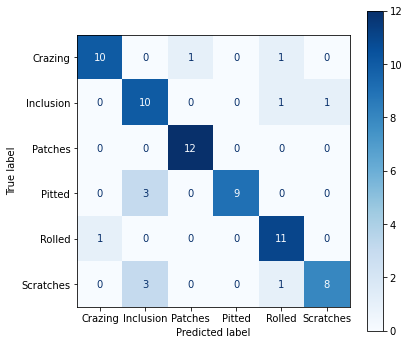

In [4]:
test_loader = tdata.DataLoader(test_dataset, batch_size=512, shuffle=False)
model.eval()
preds = np.concatenate([model(x).argmax(dim=1).detach().numpy() for x, y in test_loader])

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
ConfusionMatrixDisplay.from_predictions(y_true=test_dataset.targets, y_pred=preds, ax=ax,
                                        display_labels=test_dataset.classes, cmap=plt.cm.Blues);

**Propuesto:** De acuerdo al valor de la loss, el modelo no ha convergido. Aumenta el número de épocas de entrenamiento
 